In [1]:
#importing necessary libraries
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize
from scipy.stats import cauchy
import statistics
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import math

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [214 214 214 ...   0   0   0]
 [214 214 214 ...   0   0   0]
 [214 214 214 ...   0   0   0]]


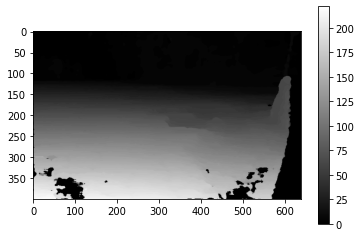

74.13637581089608


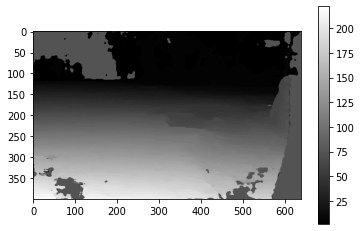

In [2]:
disparity = np.load('dispimage_5.npy')
# disparity = np.load('image_1.npy')
# disparit = cv2.imread('DISPARITYimage20.png')
# disparity = cv2.cvtColor(disparit, cv2.COLOR_BGR2GRAY)
print(disparity)
disparity3d = np.copy(disparity)
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
sum_dis = 0
disp_no =0
width1 = disparity.shape[1]
height1 = disparity.shape[0]
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity[i][j] != 0:
            sum_dis= sum_dis + disparity[i][j]
            disp_no = disp_no + 1
avg_dis = sum_dis/disp_no
print(avg_dis)
d1=[]
for i in range(height1):
    for j in range(width1):
        d1.append(disparity[i][j])

for i in range(disparity3d.shape[0]):
    for j in range(disparity3d.shape[1]):
        if(disparity3d[i][j] == 0):
            disparity3d[i][j] = avg_dis
plt.imshow(disparity3d, "gray")
plt.colorbar()
plt.show()

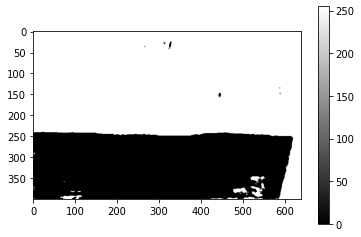

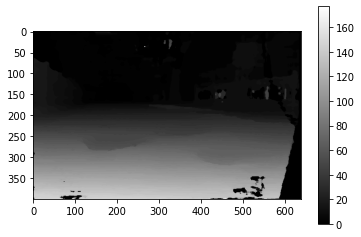

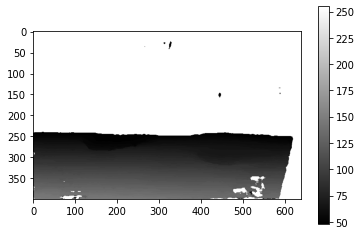

In [111]:
# ret, thresh1 = cv2.threshold(disparity, avg_dis, 255, cv2.THRESH_BINARY_INV)
# plt.imshow(thresh1, "gray")
# plt.colorbar()
# plt.show()
# disparity_2 = np.zeros((height1,width1))
# for i in range(height1):
#     for j in range(width1):
#         disparity_2[i][j] = disparity[i][j]
# plt.imshow(disparity_2, "gray")
# plt.colorbar()
# plt.show()
# for i in range(height1):
#     for j in range(width1):
#         if(thresh1[i][j] == 255):
#             disparity_2[i][j] = 255
# plt.imshow(disparity_2, "gray")
# plt.colorbar()
# plt.show()

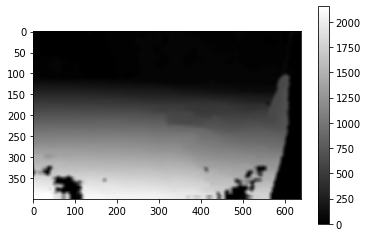

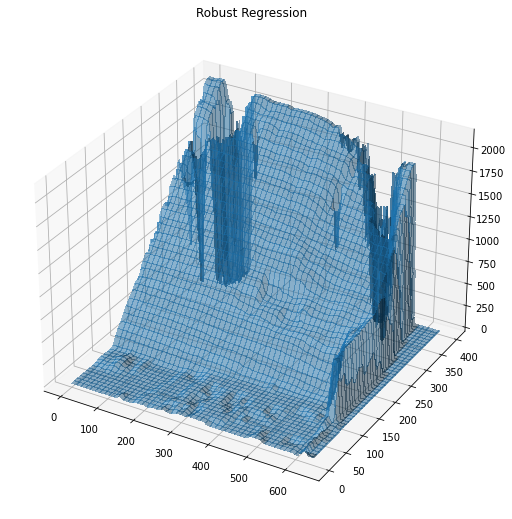

In [5]:
#experiment

disparity_3 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_3[i][j] = disparity[i][j]

for i in range(0,disparity3d.shape[0],3):
    for j in range(0,disparity3d.shape[1],3):
        sum123 = 0
        avg_new = 0
        no = 0
#         if(i+3<=disparity3d.shape[0] and j+3 <= disparity3d.shape[1]):
#             sum123 = (disparity[i][j] + disparity[i][j+1] + disparity[i][j+2] + disparity[i+1][j] +disparity[i+1][j+1] + disparity[i+1][j+2] + disparity[i+2][j] + disparity[i+2][j+1] + disparity[i+2][j+2])
#             avg_new = sum123 / 9
#             disparity_3[i][j] = avg_new
#             disparity_3[i+1][j] = avg_new
#             disparity_3[i+2][j] = avg_new
#             disparity_3[i][j+1] = avg_new
#             disparity_3[i+1][j+1] = avg_new
#             disparity_3[i+2][j+1] = avg_new
#             disparity_3[i][j+2] = avg_new
#             disparity_3[i+1][j+2] = avg_new
#             disparity_3[i+2][j+2] = avg_new
        for y in range(i,i+10):
            for x in range(j,j+10):
                if(i+10<=disparity3d.shape[0] and j+10 <= disparity3d.shape[1]):
                    sum123 = sum123 + disparity[y][x]
                    no = no+1
            avg_dis = sum123 / 100
            for y in range(i,i+10):
                for x in range(j,j+10):
                    if(i+10<=disparity3d.shape[0] and j+10 <= disparity3d.shape[1]):
                        disparity_3[y][x] = avg_dis * 10
plt.imshow(disparity_3, "gray")
plt.colorbar()
plt.show()

h =[]
w=[]
for i in range(height1):
    for j in range(width1):
        w.append(i)
        h.append(j)

w1 =np.reshape(w,(height1,width1))
h1 =np.reshape(h,(height1,width1))
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(h1,w1 ,disparity_3,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

# diff_2 =np.array(disparity_3) - np.array(zv2)
# # Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# ax.set_title('Robust Regression')
# ax.plot_surface(h1,w1 ,diff_2,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# # ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# #zp = fun(cfs , np.array(x3d), np.array(y3d))
# # ax.scatter3D(x3d, y3d, z3d)
# plt.show()

717.8730672214135


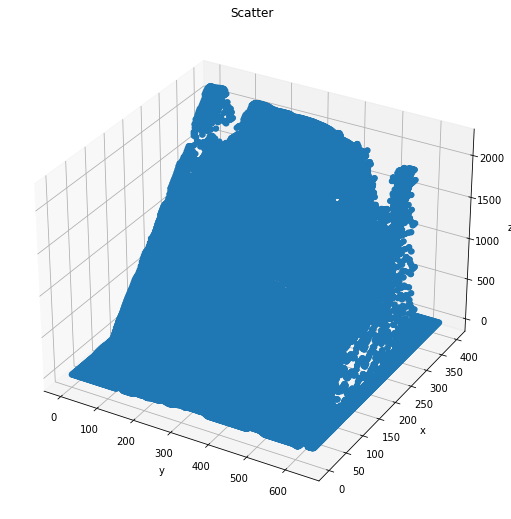

[-6.66708047e+01  1.34631087e+00  2.96786356e-01  1.26123371e-02
 -2.42098934e-03 -3.17375129e-04]


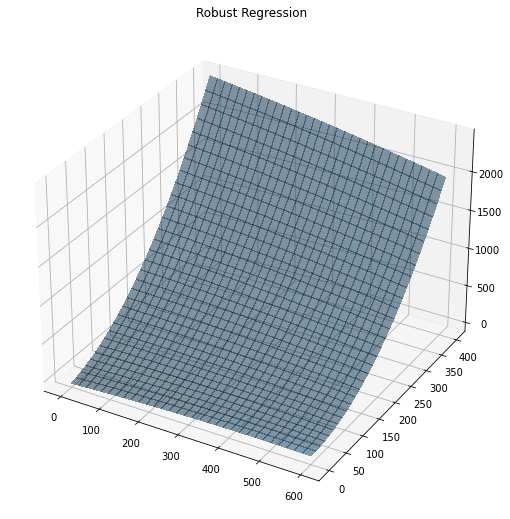

In [6]:
#experimment\
sum_dis_3 = 0
disp_no_3 = 0
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity_3[i][j] != 0:
            sum_dis_3= sum_dis_3 + disparity_3[i][j]
            disp_no_3 = disp_no_3 + 1
avg_dis_3 = sum_dis_3/disp_no_3
print(avg_dis_3)
# d3=[]
# for i in range(height1):
#     for j in range(width1):
#         d3.append(disparity_3[i][j])
# disparity3d_3 = np.zeros((height1,width1))
# for i in range(height1):
#     for j in range(width1):
#         disparity3d_3[i][j] = disparity_3[i][j]
# for i in range(disparity3d.shape[0]):
#     for j in range(disparity3d.shape[1]):
#         if(disparity_3[i][j] == 0):
#             disparity3d_3[i][j] = avg_dis

disparity4 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity4[i][j] == disparity_3[i][j]
w2=[]
h2=[]
d2=[]
for i in range(height1):
    for j in range(width1):
        w2.append(i)
        h2.append(j)
        if(disparity4[i][j]<avg_dis_3):
            disparity4[i][j]= avg_dis_3
        d2.append(disparity_3[i][j])
# print(avg_dis)
fig = plt.figure(figsize =(21, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
ax.scatter(h2,w2 , d2)
plt.show()

def fun_residual(cf, vars, z):
    x, y = vars
    return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

def fun_z(cf, x, y):

    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


# cf0 = np.ones(6)
cf01 = np.zeros(6)

res_robust = scipy.optimize.least_squares(fun_residual, cf01, loss='cauchy', f_scale=100, args=((np.array(w2), np.array(h2)), np.array(d2)))

x1 = np.linspace(0, 400, 32)

y1 = np.linspace(0, 600, 32)

xv, yv = np.meshgrid(x1, y1)
cfs1 = res_robust.x
print(cfs1)
zv2 =fun_z(cfs1, xv, yv)
z12 =zv2.flatten()
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
# ax.scatter(h,w,d)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(yv,xv,zv2,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

89.20921928641565


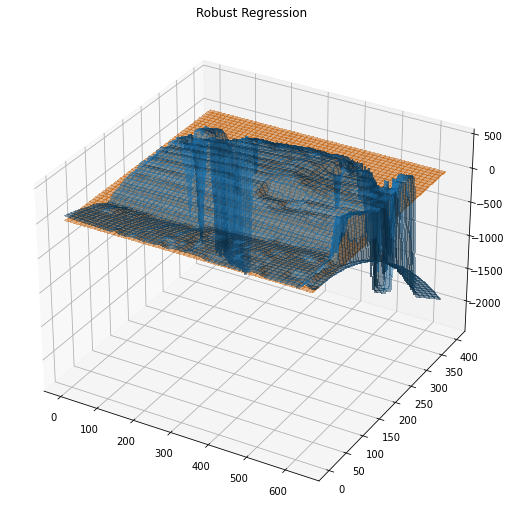

In [7]:
w4 =np.reshape(w2,(height1,width1))
h4 =np.reshape(h2,(height1,width1))
zv_n =fun_z(cfs1, w4, h4)
diff_2 =np.array(disparity_3) - np.array(zv_n)
print(diff_2[250][200])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(h4,w4 ,diff_2,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h4,w4 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

-50.723374072026324


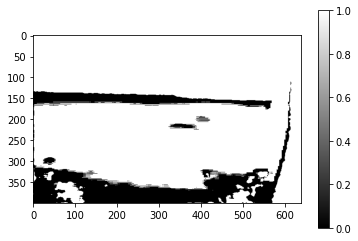

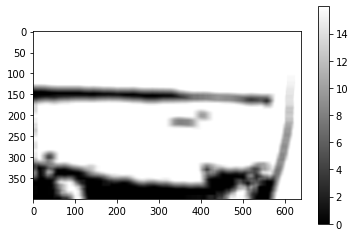

15.999999642372131
13.349349701618776
0.8343343749999997
0


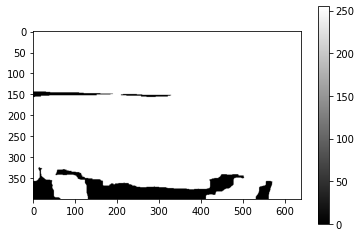

In [10]:
sum_diff =0
diff_no = 0
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity[i][j] != 0:
            sum_diff= sum_diff + diff_2[i][j]
            diff_no = diff_no + 1
avg_diff9 = sum_diff/diff_no
print(avg_diff9)

img_black = np.ones((height1,width1))
for i in range(height1):
    for j in range(width1):
#         if(diff[i][j] < -2 and disparity[i][j] >= 20):
        if(diff_2[i][j] < avg_diff9 and disparity[i][j] >= 20):
            img_black[i][j] = 0
plt.imshow(img_black , 'gray')
plt.colorbar()
plt.show()
mask_inv = cv2.bitwise_not(img_black)
kernel = np.ones((20,20),np.float32)/25
dst = cv2.filter2D(img_black,-1,kernel)
blur = cv2.GaussianBlur(img_black,(15,15),0)
plt.imshow(dst, 'gray')
plt.colorbar()
plt.show()

print(dst[0][100])

img_mask = np.ones((height1,width1))
# for i in range(1,height1-1):
#     for j in range(1,width1-1):
# #         sum = dst[i-1][j-1] + dst[i-1][j]+ dst[i-1][j+1] + dst[i][j-1] + dst[i][j]+ dst[i][j+1] + dst[i+1][j-1] + dst[i+1][j]+ dst[i+1][j+1]
# #         img_mask[i][j] = sum/9
#         sum12 = 0
#         no12 = 0
#         for y in range(i,i+10):
#             for x in range(j,j+10):
#                 if(i+10<=disparity3d.shape[0] and j+10 <= disparity3d.shape[1]):
#                     sum12 = sum12 + dst[y][x]
#                     no12 = no12+1
#         if(no12 >0):    
#             img_mask[i][j] = sum12 / no12
# plt.imshow(img_mask , 'gray')
# plt.colorbar()
# plt.show()
        
sumb = 0
no = 0
for i in range(height1):
    for j in range(width1):
        sumb= sumb + dst[i][j]
#         sumb= sumb + img_mask[i][j]
        no = no +1
avgb = sumb / no
print(avgb)

dio = dst.flatten()
# dio = img.flatten()
c = max(dio)
print(avgb/c)
print(int(avgb/c))

if avgb/c < c:
    s = avgb/c
else:
    s = int(avgb/c)
    
for i in range(height1):
    for j in range(width1):
        if(dst[i][j] > s):
            dst[i][j] = 255
        else:
            dst[i][j] = 0
        
plt.imshow(dst, 'gray')
plt.colorbar()
plt.show()

-27.065742642170857


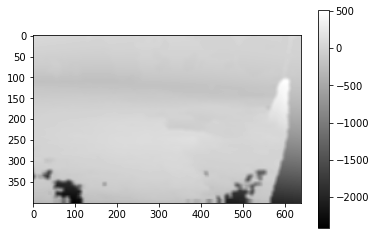

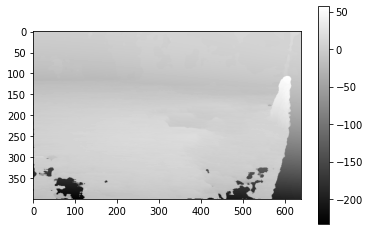

-50.723374072026324
-122.32268129105695


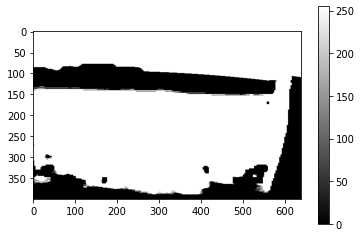

In [18]:
da = statistics.median(diff_2.flatten())
print(da)
plt.imshow(diff_2, "gray")
plt.colorbar()
plt.show()

plt.imshow(diff, "gray")
plt.colorbar()
plt.show()

sum_diff =0
diff_no =0
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity[i][j] != 0:
            sum_diff= sum_diff + diff_2[i][j]
            diff_no = diff_no + 1
avg_diff9 = sum_diff/diff_no
print(avg_diff9)

diff1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        diff1[i][j] = diff_2[i][j]

suma = 0
noa = 0
for i in range(height1):
    for j in range(width1):
        suma= suma + diff_2[i][j]
#         sumb= sumb + img_mask[i][j]
        noa = noa +1
avga = suma / noa
print(avga)
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if diff[i][j] < avga:
#             diff1[i][j] = diff_2[i][j]*10
            diff[i][j] = 0
        else:
            diff[i][j] = 255
plt.imshow(diff, "gray")
plt.colorbar()
plt.show()


In [20]:
# f = 882
# x3d=[]
# y3d = []
# for i in range(0,height1):
#     for j in range(0,width1):
#         x2 = disparity[i][j]/f *(i - ((width1)/2))
#         x3d.append(x2)
#         y2 = disparity[i][j]/f *(i - ((height1)/2))
#         y3d.append(y2)
# xv1 =np.reshape(x3d,(height1,width1))
# yv1 =np.reshape(y3d,(height1,width1))
# # Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Scatter')
# ax.set_xlabel('y')
# ax.set_ylabel('x')
# ax.set_zlabel('z')
# ax.scatter(y3d,x3d , d)
# plt.show()

In [76]:
# imgray = np.load('image_1.npy')
# # CODE TO CONVERT TO GRAYSCALE


# # gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# # save the image
# # cv2.imwrite('graypothholeresult.jpg', gray1)
# plt.subplot(331),plt.imshow(imgray, cmap='gray'),plt.title('GRAY')
# plt.xticks([]), plt.yticks([])
# #CONTOUR DETECTION CODE
# # imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# ret,thresh = cv2.threshold(imgray,127,255,0)

# contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# #img1 = im.copy()
# img2 = imgray.copy()

# #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
# out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
# #out = np.hstack([img1, img2])


# img = cv2.imread('index2.jpg',0)
# ret,thresh = cv2.threshold(img,127,255,0)
# contours,hierarchy = cv2.findContours(thresh, 1, 2) 
# # cnt = contours[0]
# # M = cv2.moments(cnt)

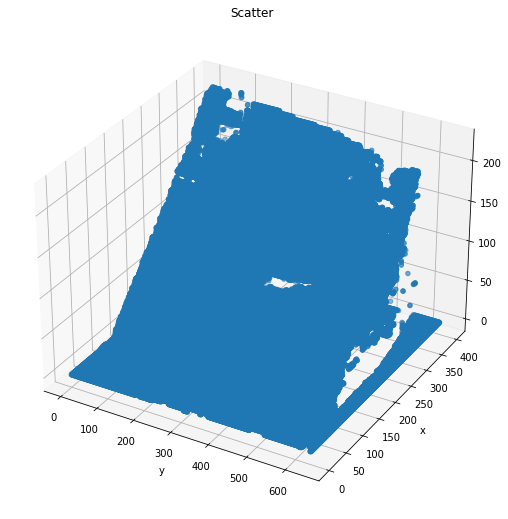

[-5.41479826e-02  8.29634519e-02 -3.62213579e-03  1.27774463e-03
 -1.46053705e-04 -1.23426354e-05]


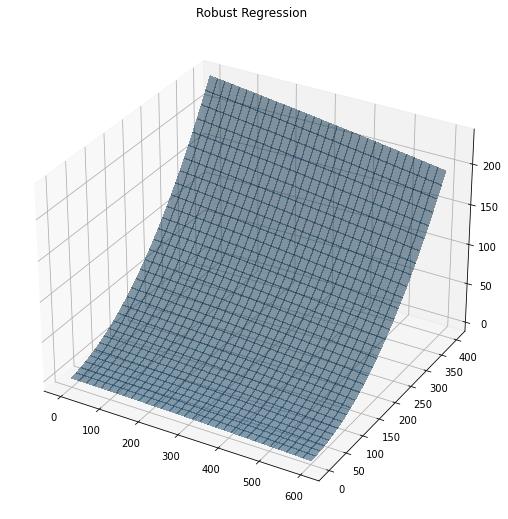

In [11]:
disparity1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity1[i][j] == disparity3d[i][j]
w=[]
h=[]
d=[]
for i in range(height1):
    for j in range(width1):
        w.append(i)
        h.append(j)
        if(disparity1[i][j]<avg_dis):
            disparity1[i][j]= avg_dis
        d.append(disparity[i][j])
# print(avg_dis)
fig = plt.figure(figsize =(21, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
ax.scatter(h,w , d)
plt.show()

def fun_residual(cf, vars, z):
    x, y = vars
    return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

def fun_z(cf, x, y):

    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


# cf0 = np.ones(6)
cf0 = np.zeros(6)

res_robust = scipy.optimize.least_squares(fun_residual, cf0, loss='cauchy', f_scale=100, args=((np.array(w), np.array(h)), np.array(d)))

x1 = np.linspace(0, 400, 32)

y1 = np.linspace(0, 600, 32)

xv, yv = np.meshgrid(x1, y1)
cfs = res_robust.x
print(cfs)
zv =fun_z(cfs, xv, yv)
z1 =zv.flatten()
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
# ax.scatter(h,w,d)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(yv,xv,zv,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

[[  1.   1.   1. ...   1.   1.   1.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  1.   1.   1. ...   1.   1.   1.]
 ...
 [255. 255. 255. ...   1.   1.   1.]
 [255. 255. 255. ...   1.   1.   1.]
 [255. 255. 255. ...   1.   1.   1.]]


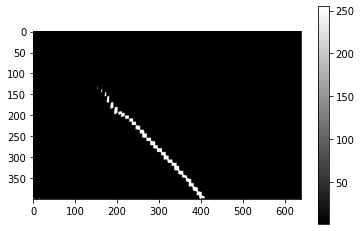

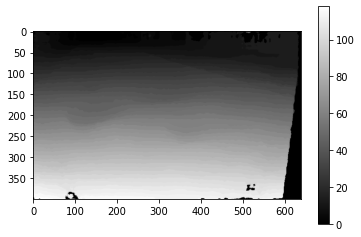

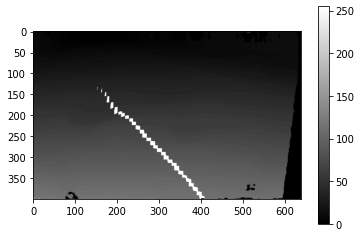

In [5]:
# potholes = np.ones((height1,width1))
# for i in range(height1):
#     for j in range(width1):
#         estimation = fun_z(cfs,j,i)
#         disparityGiven =disparity[i][j]
# #         condition1 =(2*abs(math.exp(600/(i-30)))+15*i/600-10)
#         condition1 =(2*abs(math.exp(height1/(i+10)))+i/40 -10)
#         condition2 = (i*0.063+18)
#         if((disparityGiven - estimation)**2>condition1 and (disparityGiven - estimation)<0 and (disparityGiven - estimation)**2<condition2):
# #             potholesSize=potholesSize+1;
#             potholes[i][j] = 255
# print(potholes)
# plt.imshow(potholes, "gray")
# plt.colorbar()
# plt.show()

# disparity_1 = np.zeros((height1,width1))
# for i in range(height1):
#     for j in range(width1):
#         disparity_1[i][j] = disparity[i][j]
# plt.imshow(disparity_1, "gray")
# plt.colorbar()
# plt.show()
# for i in range(height1):
#     for j in range(width1):
#         if(potholes[i][j] == 255):
#             disparity_1[i][j] = 255
# plt.imshow(disparity_1, "gray")
# plt.colorbar()
# plt.show()

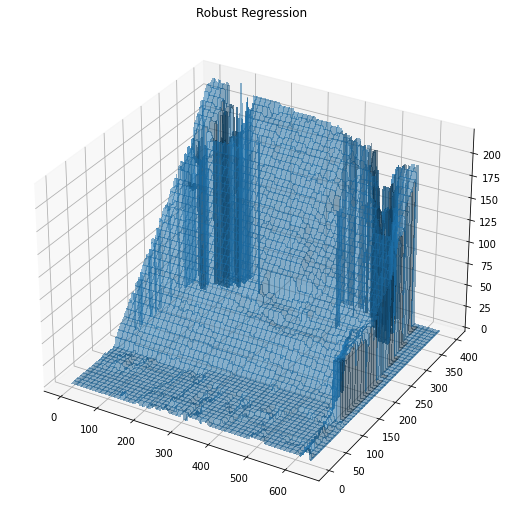

8.799072087122823


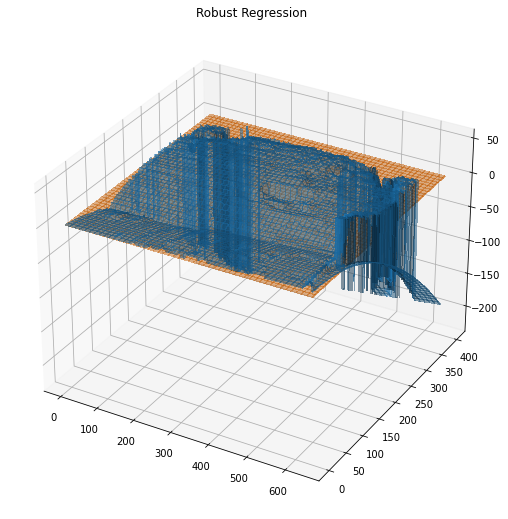

In [16]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
w1 =np.reshape(w,(height1,width1))
h1 =np.reshape(h,(height1,width1))
# ax.scatter(xv,yv ,zv)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

zv =fun_z(cfs, w1, h1)
diff =np.array(disparity) - np.array(zv)
print(diff[300][250])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(h1,w1 ,diff,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

In [291]:
sumc = 0
noc = 0
for i in range(height1):
    for j in range(width1):
        sumc= sumc + diff[i][j]
#         sumb= sumb + img_mask[i][j]
        noc = noc +1
avgc = sumc / noc
print(avgc)
print(int(avgc))

-2.368567113561069
-2


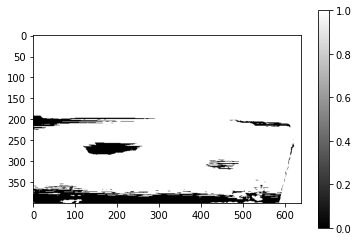

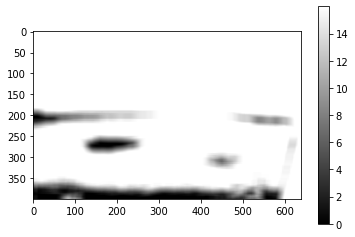

15.999999642372131
14.752454357756942
15.999999642372138
0.9220284179687496
0


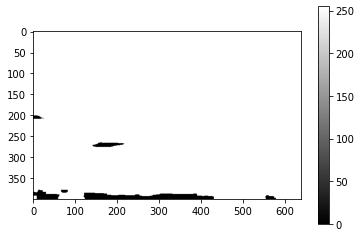

In [292]:
img_black1 = np.ones((height1,width1))
for i in range(height1):
    for j in range(width1):
#         if(diff[i][j] < -2 and disparity[i][j] >= 20):
        if(diff[i][j] < avgc and disparity[i][j] >= 20):
            img_black1[i][j] = 0
plt.imshow(img_black1 , 'gray')
plt.colorbar()
plt.show()
mask_inv1 = cv2.bitwise_not(img_black1)
kernel1 = np.ones((20,20),np.float32)/25
dst1 = cv2.filter2D(img_black1,-1,kernel1)
blur1 = cv2.GaussianBlur(img_black1,(15,15),0)
plt.imshow(dst1, 'gray')
plt.colorbar()
plt.show()

print(dst1[0][100])

img_mask1 = np.ones((height1,width1))
for i in range(1,height1-1):
    for j in range(1,width1-1):
#         sum = dst[i-1][j-1] + dst[i-1][j]+ dst[i-1][j+1] + dst[i][j-1] + dst[i][j]+ dst[i][j+1] + dst[i+1][j-1] + dst[i+1][j]+ dst[i+1][j+1]
#         img_mask[i][j] = sum/9
        sum12 = 0
        no12 = 0
        for y in range(i,i+10):
            for x in range(j,j+10):
                if(i+10<=disparity3d.shape[0] and j+10 <= disparity3d.shape[1]):
                    sum12 = sum12 + dst1[y][x]
                    no12 = no12+1
        if(no12 >0):    
            img_mask1[i][j] = sum12 / no12
# plt.imshow(img_mask , 'gray')
# plt.colorbar()
# plt.show()
        
suma = 0
noa = 0
for i in range(height1):
    for j in range(width1):
        suma= suma + dst1[i][j]
#         sumb= sumb + img_mask[i][j]
        noa = noa +1
avga = suma / noa
print(avga)

dio = dst1.flatten()
# dio = img.flatten()
e = max(dio)
print(e)
print(avga/e)
print(int(avga/e))
if avga/e < e:
    s = avga/e
else:
    s = int(avga/e)
for i in range(height1):
    for j in range(width1):
        if(dst1[i][j] > s):
            dst1[i][j] = 255
        else:
            dst1[i][j] = 0
        
plt.imshow(dst1, 'gray')
plt.colorbar()
plt.show()

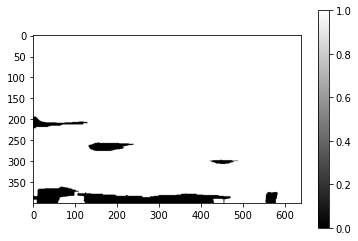

In [301]:
img_pot = np.ones((height1,width1))
for i in range(height1):
    for j in range(width1):
        if dst1[i][j] == 0 or dst[i][j] == 0:
            img_pot[i][j] = 0
plt.imshow(img_pot, 'gray')
plt.colorbar()
plt.show()

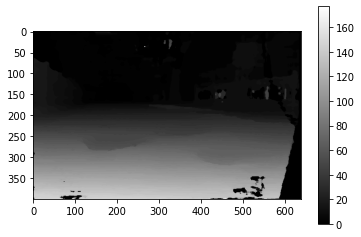

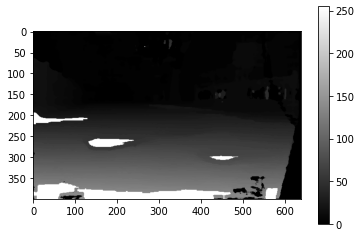

In [302]:
disparity_z = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_z[i][j] = disparity[i][j]
plt.imshow(disparity_z , 'gray')            
plt.colorbar()
plt.show()
for i in range(height1):
    for j in range(width1):
        if(img_pot[i][j] == 0):
            disparity_z[i][j] = 255
plt.imshow(disparity_z , 'gray')            
plt.colorbar()
plt.show()

In [216]:
# for x in range(min(diffli),max(diffli),5): 
#     for i in range(0,height1):
#         for j in range(0,width1):
#             if(diff[i][j]>x and diff[i][j]<x+5):
#                 c1 = c1 +1
# cone.append(c1)


NameError: name 'diffli' is not defined

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
[51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.

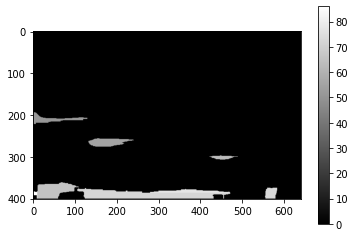

In [303]:
disparity_pl = np.zeros((height1+1,width1+1))
child=[]
mom =[]
a=50
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_z[i][j] == 255):
            if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]==0 ):
                a = a+1
                print(a)
                disparity_pl[i][j]=a
            else:
                if(disparity_pl[i-1][j]!=0 or disparity_pl[i][j-1]!=0):
                    if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]!=0):
                        disparity_pl[i][j]=disparity_pl[i][j-1]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]==0):
                        disparity_pl[i][j]=disparity_pl[i-1][j]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]!=0):
                        c = min(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        mo =c
                        disparity_pl[i][j] = c
                        chil = max(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        if mo in child:
                            mom.append(mom[child.index(mo)])
                        else:
                            mom.append(mo)
                        child.append(chil)
#                         print(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]), " is a child of ",c)
#                         if max(disparity_pl[i-1][j] , disparity_pl[i][j-1]) not in child:
#                             child.append(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]))
#                         if c not in mom:
#                             mom.append(c)
print(mom)
print(child)
# for i in mom:
#     if i in child:
#         mom.remove(i)
# print(mom)
cv2.imshow('Contours', disparity_pl)
cv2.waitKey(0)
cv2.destroyAllWindows()
# # plt.imshow(disparity_pl , 'gray')            
# # plt.colorbar()
# # plt.show()
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_pl[i][j] in child):
            disparity_pl[i][j] = mom[child.index(disparity_pl[i][j])]
cv2.imshow('Contours', disparity_pl)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(disparity_pl , 'gray')            
plt.colorbar()
plt.show()
# # print(disparity_pl)
# # print(child)
# # print(mom)
# count = 0
# for i in range(1,height1):
#     for j in range(1,width1):
#         if(disparity_pl[i][j] != 0 or disparity_pl[i][j] != 1):
#             count= count +1
# print(count)

In [304]:
single = [] 
[single.append(x) for x in mom if x not in single]
print(single)

[51.0, 52.0, 55.0, 63.0, 66.0, 73.0, 75.0, 72.0, 77.0, 82.0, 86.0]


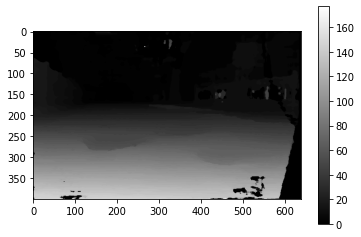

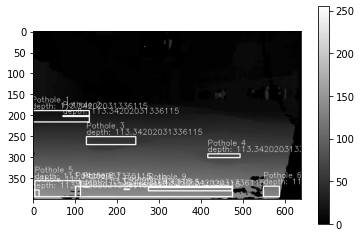

In [305]:
disparity_rect = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect[i][j] = disparity[i][j]
plt.imshow(disparity_rect , 'gray')            
plt.colorbar()
plt.show()
top=[]
bottom=[]
left =[]
right =[]
sum_calc = 0
d_no = 0
for x in range(len(single)):
    proxy =[]
    proxy2=[]
    for i in range(0,height1):
        for j in range(0,width1):
            if(disparity_pl[i][j] == single[x]):
                proxy.append(i)
                break
    top.append(proxy[0])
    bottom.append(proxy[len(proxy)-1])
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                sum_calc = sum_calc + disparity[i][j]
                d_no = d_no+1
    avg_disp = sum_calc / d_no 
    #Assumption: I encounter the particular label only in one pothole 
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                proxy2.append(j)
                break
    left.append(proxy2[0])
    right.append(proxy2[len(proxy2)-1])
#     for i in range(height1-1, -1):
#         for j in range(0,width1):
#             if(disparity_pl[i][j] == single[x]):
#                 bottom.append[j]
#                 break 
a =1
for x in range(len(single)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]-5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'depth: '+str(avg_disp)
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
    disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    a=a+1
plt.imshow(disparity_rect , 'gray')            
plt.colorbar()
plt.show()
# cv2.imshow('Contours', disparity_z)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [306]:
single1 = []
remove = []
remove=[]
removel=[]
remover=[]
removet=[]
removeb=[]
[single1.append(x) for x in single]
print(single1)
print(left)
print(right)
print(top)
print(bottom)
avg =[]
avg_pot=[]
for x in range(len(single)):
#     start_point = (left[x]-5 , top[x]-5)
#     end_point = (right[x]+5 , bottom[x]+5)
#     start_point_txt = (left[x]-5 , top[x]-25)
#     start_point_txt1 = (left[x]-5 , top[x]-10)
#     # Blue color in BGR
#     color = (255, 0, 0)

#     # Line thickness of 2 px
#     thickness = 2
#     txt = 'Pothole '+str(a)
#     txt1 = 'depth: '+str(avg_disp)
#     # Using cv2.rectangle() method
#     # Draw a rectangle with blue line borders of thickness of 2 px
#     disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
#     disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     a=a+1
    sum_final =0
    dis_final_no =0
    sum_final_pot =0
    dis_final_no_pot =0
    for s in range(top[x]-20, bottom[x]+20):
        for r in range(left[x]-20 , right[x]+20):
            if(s < 0 or s >= disparity.shape[0] or r<0 or r>=disparity.shape[1]):
                if single[x] not in remove:
                    remove.append(single[x])
                    removel.append(left[x])
                    remover.append(right[x])
                    removet.append(top[x])
                    removeb.append(bottom[x])
#                 print(single[x])
            else:
                if(disparity_pl[s][r] ==0 and disparity[s][r] != 0):
                    sum_final = sum_final + disparity[s][r]
                    dis_final_no = dis_final_no + 1
                else:
                    sum_final_pot = sum_final_pot + disparity[s][r]
                    dis_final_no_pot = dis_final_no_pot + 1
    avg_dis_final = sum_final / dis_final_no
    avg.append(avg_dis_final)
    avg_dis_final_pot = sum_final_pot / dis_final_no_pot
    avg_pot.append(avg_dis_final_pot)
print(remove)
print(avg)
print(avg_pot)
diff_pot =[]
for x in range(len(avg)):
    difflia = avg[x]-avg_pot[x]
    diff_pot.append(difflia)
print()
print(diff_pot)
for i in range(len(remove)):
    single1.remove(remove[i])
    left.remove(removel[i])
    right.remove(remover[i])
    top.remove(removet[i])
    bottom.remove(removeb[i])
print(single1)

[51.0, 52.0, 55.0, 63.0, 66.0, 73.0, 75.0, 72.0, 77.0, 82.0, 86.0]
[1, 76, 132, 422, 9, 555, 124, 106, 280, 222, 1]
[129, 129, 240, 489, 108, 583, 126, 471, 470, 225, 9]
[194, 206, 256, 297, 361, 374, 375, 374, 377, 381, 383]
[221, 208, 275, 306, 399, 399, 376, 399, 385, 382, 399]
[51.0, 66.0, 73.0, 72.0, 77.0, 82.0, 86.0]
[26.364296245888625, 25.323722523551243, 57.19570011025358, 74.55576169861884, 121.14117102522565, 116.45730994152046, 126.17347865576748, 123.77131816230141, 123.73335509138381, 127.26545842217485, 131.88615384615386]
[27.034305317324186, 27.555831265508687, 50.74932249322493, 70.4795918367347, 119.68368926029093, 58.753173483779975, 121.3220611916264, 128.17752326413745, 127.68314726209464, 139.19891745602166, 131.54679144385025]

[-0.6700090714355618, -2.2321087419574432, 6.446377617028652, 4.076169861884139, 1.4574817649347125, 57.70413645774049, 4.851417464141079, -4.406205101836036, -3.949792170710822, -11.933459033846816, 0.3393624023036068]
[52.0, 55.0, 63.0,

[76, 132, 422, 124]


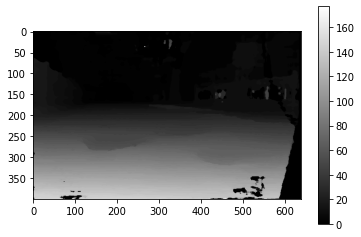

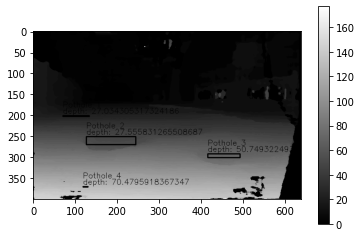

In [307]:
print(left)
disparity_rect_1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect_1[i][j] = disparity[i][j]
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()

a =1
for x in range(len(single1)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]-5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (0, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'depth: '+str(avg_pot[x])
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect_1 = cv2.rectangle(disparity_rect_1, start_point, end_point, color, thickness)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    a=a+1
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()

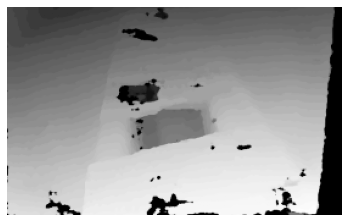

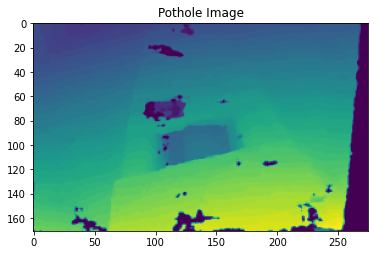

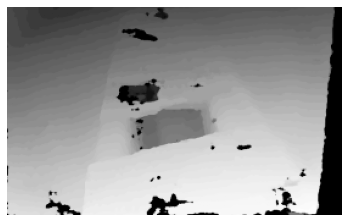

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - image is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'image'


In [169]:
# import cv2
# import numpy as np
# # import pygame
# import time
# import smtplib
# from matplotlib import pyplot as plt


# # In[2]:


# # Show the image
# # Open a new thread to manage the external cv2 interaction
# # cv2.startWindowThread()
# def plt_show(image, title=""):
# #     if len(image.shape) == 3:
# #         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     plt.axis("off")
#     plt.title(title)
# #     plt.imshow(image, cmap="Greys_r")
# #     plt.imshow(image, cmap=plt.cm.Spectral)
#     plt.imshow(image, cmap=plt.cm.Greys_r)
#     plt.show()


# # #### Resize the image

# # In[3]:


# def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
#     # initialize the dimensions of the image to be resized and
#     # grab the image size
#     dim = None
#     (h, w) = image.shape[:2]

#     # if both the width and height are None, then return the
#     # original image
#     if width is None and height is None:
#         return image

#     # check to see if the width is None
#     if width is None:
#         # calculate the ratio of the height and construct the
#         # dimensions
#         r = height / float(h)
#         dim = (int(w * r), height)

#     # otherwise, the height is None
#     else:
#         # calculate the ratio of the width and construct the
#         # dimensions
#         r = width / float(w)
#         dim = (width, int(h * r))

#     # resize the image
#     resized = cv2.resize(image, dim, interpolation = inter)

#     # return the resized image
#     return resized


# # In[4]:


# # r_image1 = cv2.imread('Pothole.jpg')
# r_image1 = disparity
# r_image2 = image_resize(r_image1, width = 275, height = 180)


# # In[5]:


# plt_show(r_image2)


# # In[6]:


# plt.title("Pothole Image")
# plt.imshow(r_image2)
# plt.show()
# #resize_image = cv2.resize(r_image1, (275,180))
# #plt_show(resize_image)


# # In[7]:


# #im = cv2.imread('index4.jpg')
# im = r_image2
# plt_show(im)


# # In[8]:


# # Convert the GrayScale
# # gray1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# # plt_show(gray1)


# # In[9]:


# # save the image
# # cv2.imwrite('grayImg.jpg', gray1)


# # #### Contour Detection Code

# # In[10]:


# # imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# # plt_show(imgray)


# # In[11]:


# ret,thresh = cv2.threshold(im,127,255,0)


# # In[12]:


# #contours1, _, a = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# contours1,hierarchy1 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(image1, contours1, -1, (0,255,75), 2)
# # show_image(res_img)

# # In[13]:


# plt_show(image1)


# # In[14]:


# #print(contours1)
# #contours1.shape
# # plt.title("Pothole Image")
# # plt.imshow(image1)
# # plt.show()


# # In[15]:


# contours2,hierarchy2 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


# # In[16]:


# plt_show(image2)


# # In[17]:


# # copy the real image
# img2 = im.copy()


# # In[18]:


# plt_show(img2)


# # In[19]:


# out = cv2.drawContours(img2, contours2, -1, (0,250,0),1)


# # In[20]:


# plt.title("drawContours Pothole Image")
# plt.imshow(out)
# plt.show()


# # #### Detec the pothole

# # In[21]:


# cv2.imshow('img1',img2)
# cv2.waitKey(0)
# plt.subplot(331),plt.imshow(im),plt.title('GRAY')
# plt.xticks([]), plt.yticks([])


# # In[22]:


# img = cv2.imread('index2.jpg',0)


# # In[23]:


# plt_show(img)


# # In[24]:


# ret,thresh = cv2.threshold(img,127,255,0)


# # In[25]:


# image, contours = cv2.findContours(thresh, 1, 2)


# # In[26]:


# cnt = contours[0]
# M = cv2.moments(cnt)
# print(M)


# # In[27]:


# perimeter = cv2.arcLength(cnt,True)
# print (perimeter)


# # In[28]:


# area = cv2.contourArea(cnt)
# print (area)


# # In[29]:


# epsilon = 0.1*cv2.arcLength(cnt,True)
# approx = cv2.approxPolyDP(cnt,epsilon,True)
# print (epsilon)
# print (approx)


# # In[30]:


# for c in contours:
#     rect = cv2.boundingRect(c)
#     if rect[2] < 100 or rect[3] < 100: continue
#     #print cv2.contourArea(c)
#     x,y,w,h = rect
#     cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
#     cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    
#     plt.title("Moth Detected Pothole Image")
#     plt.imshow(img2)
#     plt.show()
    
# cv2.imshow("Show",img2)
# #cv2.imshow('img' , resize_img)
# x = cv2.waitKey(0)
# if x == 27:
#     cv2.destroyWindow('img')
# cv2.waitKey()  
# cv2.destroyAllWindows()


# # In[31]:


# k = cv2.isContourConvex(cnt)
# print(k)


# # In[32]:


# #blur
# blur = cv2.blur(im,(5,5))


# # In[33]:


# plt_show(blur)


# # In[34]:


# #guassian blur 
# gblur = cv2.GaussianBlur(im,(5,5),0)
# plt_show(gblur)


# # In[35]:


# #median 
# median = cv2.medianBlur(im,5)
# plt_show(median)


# # In[36]:


# #erosion
# kernel = np.ones((5,5),np.uint8)
# erosion = cv2.erode(median,kernel,iterations = 1)


# # In[37]:


# dilation = cv2.dilate(erosion,kernel,iterations = 5)


# # In[38]:


# #erosion followed dilation
# closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)


# # In[39]:


# #canny edge detection
# edges = cv2.Canny(dilation,9,220)  


# # In[40]:


# #plotting using matplotlib
# plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
# plt.xticks([]), plt.yticks([])
# plt.show()


# # In[41]:


# plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
# plt.xticks([]), plt.yticks([])  
# plt.show()


# # In[42]:


# plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
# plt.xticks([]), plt.yticks([]) 
# plt.show()


# # In[43]:


# plt.subplot(337),plt.imshow(img,cmap = 'gray')
# plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
# plt.show()


# # In[44]:


# plt.subplot(338),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.show()


# # In[45]:


# plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
# plt.xticks([]), plt.yticks([])
# plt.show()


# # In[46]:


# plt.subplot(336),plt.imshow(closing),plt.title('closing')
# plt.xticks([]), plt.yticks([])
# plt.show()


# # 
# # #### Plot all images

# # In[47]:


# #plotting using matplotlib
# plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
# plt.xticks([]), plt.yticks([])
# plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
# plt.xticks([]), plt.yticks([])        
# plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
# plt.xticks([]), plt.yticks([]) 
# plt.subplot(337),plt.imshow(img,cmap = 'gray')
# plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(338),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
# plt.xticks([]), plt.yticks([])
# plt.subplot(336),plt.imshow(closing),plt.title('closing')
# plt.xticks([]), plt.yticks([])
# plt.show()


# # #### alerting the driver



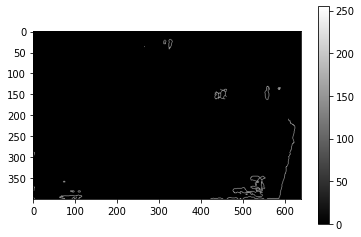

In [6]:
# edged = cv2.Canny(disparity, avg_dis, 250)
# # cv2.imshow("edged", edged)
# plt.imshow(edged, "gray")
# plt.colorbar()
# # plt.show()

(array([[[ 99, 398]],

       [[ 99, 399]],

       [[100, 399]]], dtype=int32), array([[[ 80, 392]],

       [[ 81, 391]],

       [[ 82, 392]],

       [[ 81, 393]]], dtype=int32), array([[[ 80, 390]],

       [[ 81, 389]],

       [[ 82, 390]],

       [[ 81, 391]]], dtype=int32), array([[[526, 370]],

       [[527, 369]],

       [[528, 370]],

       [[527, 371]]], dtype=int32), array([[[512, 365]],

       [[518, 365]],

       [[519, 366]],

       [[519, 367]],

       [[517, 369]],

       [[516, 369]],

       [[517, 369]],

       [[518, 370]],

       [[517, 371]],

       [[516, 371]],

       [[517, 372]],

       [[519, 372]],

       [[520, 373]],

       [[520, 374]],

       [[522, 372]],

       [[524, 372]],

       [[525, 373]],

       [[526, 373]],

       [[527, 372]],

       [[530, 375]],

       [[530, 376]],

       [[529, 377]],

       [[529, 378]],

       [[528, 379]],

       [[522, 379]],

       [[520, 377]],

       [[517, 377]],

       [[517, 378]]

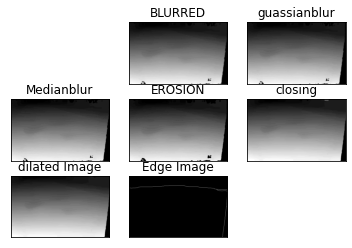

In [131]:
# plt.subplot(331),plt.imshow(gray1, cmap='gray'),plt.title('GRAY')
# plt.xticks([]), plt.yticks([])
#CONTOUR DETECTION CODE
# imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(disparity,127,255,0)

# _, contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# _, contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#img1 = im.copy()
img2 = disparity.copy()

#out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
#out = np.hstack([img1, img2])


# img = cv2.imread('index2.jpg',0)
img = cv2.imread('DISPARITYimage20.png')
gray1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray1,20,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2) 
print(contours)
cnt = contours[0]
M = cv2.moments(cnt)

#print M
perimeter = cv2.arcLength(cnt,True)
#print perimeter
area = cv2.contourArea(cnt)
#print area
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
#print epsilon
#print approx
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    print(cv2.contourArea(c))
    x,y,w,h = rect
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
    cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))

#cv2.waitKey()  
#cv2.destroyAllWindows()
k = cv2.isContourConvex(cnt)

#to check convexity
print(k)
#blur
blur = cv2.blur(gray1,(5,5))
#guassian blur 
gblur = cv2.GaussianBlur(gray1,(5,5),0)
#median 
median = cv2.medianBlur(gray1,5)
#erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(median,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 5)
#erosion followed dilation
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
#canny edge detection
edges = cv2.Canny(dilation,9,220)  
#plotting using matplotlib
plt.subplot(332),plt.imshow(blur,cmap = 'gray'),plt.title('BLURRED')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(gblur,cmap = 'gray'),plt.title('guassianblur')
plt.xticks([]), plt.yticks([])        
plt.subplot(334),plt.imshow(median,cmap = 'gray'),plt.title('Medianblur')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(dilation,cmap = 'gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(erosion,cmap = 'gray'),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(closing,cmap = 'gray'),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()